In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_train = pd.read_csv('./loan_sanction_train.csv',index_col=0)
df_test = pd.read_csv('./loan_sanction_test.csv',index_col=0)

df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
 
print(df_train.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [4]:
df_train["Gender"].fillna("Unknown", inplace = True)
df_train["Self_Employed"].fillna("Unknown", inplace = True)
df_train["Dependents"] = df_train["Dependents"].replace('3+',3)
df_train["Married"].fillna("Unknown", inplace = True)

df_test["Gender"].fillna("Unknown", inplace = True)
df_test["Self_Employed"].fillna("Unknown", inplace = True)
df_test["Dependents"] = df_test["Dependents"].replace('3+',3)
df_test["Married"].fillna("Unknown", inplace = True)

In [5]:
print(df_train.isnull().sum())

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
df_train["Dependents"] = imp.fit_transform(df_train[["Dependents"]]).ravel()
df_train["LoanAmount"] = imp.fit_transform(df_train[["LoanAmount"]]).ravel()
df_train["Loan_Amount_Term"] = imp.fit_transform(df_train[["Loan_Amount_Term"]]).ravel()
df_train["Credit_History"] = imp.fit_transform(df_train[["Credit_History"]]).ravel()

In [7]:

print(df_train.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
df_test["Dependents"] = imp.fit_transform(df_test[["Dependents"]]).ravel()
df_test["LoanAmount"] = imp.fit_transform(df_test[["LoanAmount"]]).ravel()
df_test["Loan_Amount_Term"] = imp.fit_transform(df_test[["Loan_Amount_Term"]]).ravel()
df_test["Credit_History"] = imp.fit_transform(df_test[["Credit_History"]]).ravel()

In [9]:
print(df_test.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [10]:
df_train = df_train.astype({"Dependents":'float', "ApplicantIncome":'float', "CoapplicantIncome":'float', "LoanAmount":'float', "Loan_Amount_Term":'float', "Credit_History":'float'})
df_train.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
df_test = df_test.astype({"Dependents":'float', "ApplicantIncome":'float', "CoapplicantIncome":'float', "LoanAmount":'float', "Loan_Amount_Term":'float', "Credit_History":'float'})
df_test.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [12]:

import seaborn as sns


In [13]:

num_cols=df_train.select_dtypes([np.number]).columns
print(num_cols)
cat_cols=df_train.select_dtypes('object').drop(['Loan_Status'],axis=1).columns
print(cat_cols)

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')


In [14]:
original_length_train = df_train.shape[0]   
print(f'Length of DataFrame: {df_train.shape[0]}') 
print(f'Width of DataFrame: {df_train.shape[1]}')  

Length of DataFrame: 614
Width of DataFrame: 12


In [15]:
# feature selection
X_train = df_train.iloc[:, :-1].values 
y_train = df_train.iloc[:, -1].values 

In [16]:
X_test = df_test.iloc[:,:].values

In [17]:
print(X_test[0])
print(len(X_test[0]))

['Male' 'Yes' 0.0 'Graduate' 'No' 5720.0 0.0 110.0 360.0 1.0 'Urban']
11


In [18]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,3,4,10])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.transform(X_test))

In [19]:
print(X_train[0])
print(len(X_train[0]))

[0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 5849.0 0.0
 146.41216216216216 360.0 1.0]
20


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [21]:
print(y_train[0])

1


In [22]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,11:] = sc.fit_transform(X_train[:,11:])
X_test[:,11:] = sc.fit_transform(X_test[:,11:])

In [23]:
#printing the first value of X_train after scaling
print(X_train[0])

[0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 -0.641478178018207
 -0.7820157008848616 1.4281470373865746 -0.7614902772486241
 0.0729908228506884 -0.5544873301529847 3.3847857674402117e-16
 0.27985054320228187 0.4516404506660835]


In [24]:
print(len(X_test[0]))
print(len(X_train[0]))

20
20


In [25]:
# logistic regression
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)  

LogisticRegression(random_state=0)

In [26]:
y_test_pred=classifier.predict(X_test)
y_train_pred=classifier.predict(X_train)


In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

[[ 84 108]
 [  8 414]]


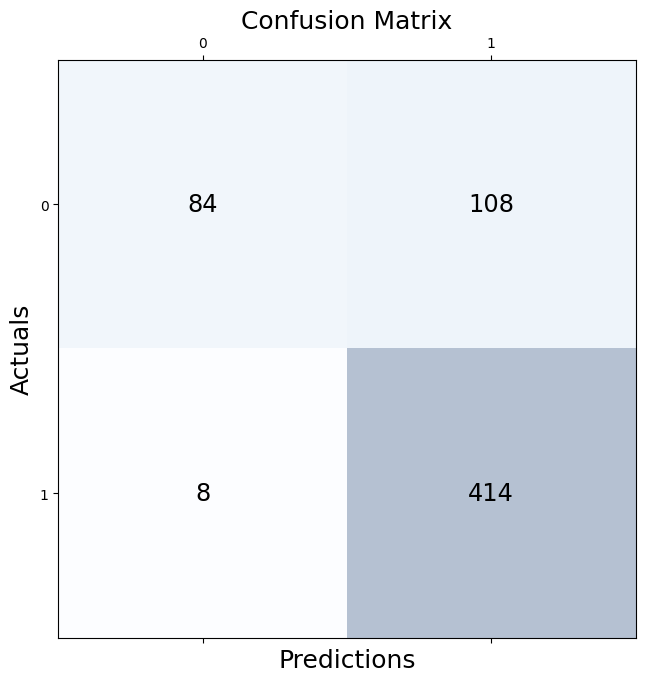

In [28]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_train, y_train_pred)
prec = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", recall)
print("F1: ",f1)

Accuracy:  0.8110749185667753
Precision:  0.7931034482758621
Recall:  0.981042654028436
F1:  0.8771186440677966
